In [1]:
import os
os.environ['OMP_NUM_THREADS'] = '1'

# Load packages

In [19]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_diabetes
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mlxtend.plotting import plot_decision_regions

# Iris dataset experiments

## Load dataset

In [3]:
dataset_dict = load_iris()
data = dataset_dict['data']
target = dataset_dict['target']
target_names = dataset_dict['target_names']

In [11]:
data_df = pd.DataFrame(data)
data_df.columns = dataset_dict['feature_names']
data_df = data_df.assign(target = target)
data_df['target'] = data_df['target'].map(lambda x: target_names[x])

data_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


### PCA + *k*-means

In [5]:
def kmeans(data, n_clusters, n_init=1, n_iters=100, tol=0.0001):
    clusterer = KMeans(
        n_clusters=n_clusters, 
        n_init=n_init, 
        max_iter=n_iters, 
        tol=tol, 
        random_state=14)

    clusterer.fit(data)
    all_predictions = clusterer.predict(data)
    centroids = clusterer.cluster_centers_
    return all_predictions, centroids, clusterer

In [6]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)

Experiment 1: Increasing the number of clusters (*k*)

e:\anaconda3\envs\um_lab1\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


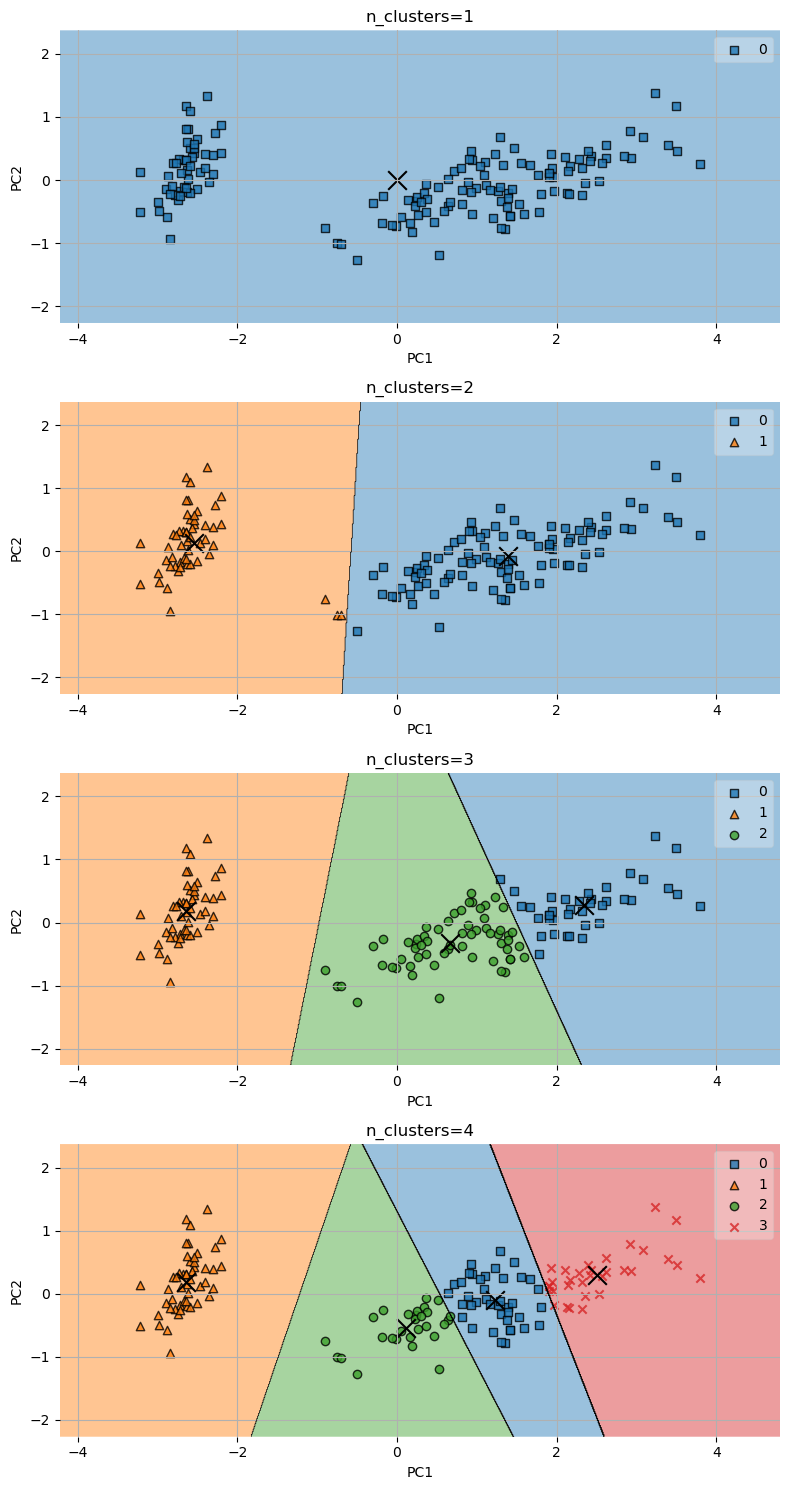

In [7]:
ns_clusters = [1,2,3,4]

plt.figure(figsize=(8,15))
for n, i in zip(ns_clusters, range(len(ns_clusters))):
    
    all_predictions, centroids, clusterer = kmeans(reduced_data, n_clusters=n)
    
    plt.subplot(len(ns_clusters),1,i+1)
    plot_decision_regions(reduced_data, all_predictions, clf=clusterer)
    plt.scatter(centroids[:,0], centroids[:,1], c='black', marker='x', s=180)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title(f"n_clusters={n}")
    plt.tight_layout()
    plt.grid()

# Diabetes dataset experiments

In [49]:
dataset_diabetes_dict = load_diabetes(scaled=True)

data_diabetes = dataset_diabetes_dict['data']
target_diabetes = dataset_diabetes_dict['target']

data_diabetes.shape, target_diabetes.shape

((442, 10), (442,))

Experiment 1: Finding *k* using inertia

In [50]:
def plot_inertia(data):
    k_values            = []
    inertia_scores_vec = []

    for k in range(2,15):
        clusterer = KMeans(n_clusters=k)
        clusterer.fit(data)
        inertia_scores_vec.append(clusterer.inertia_)
        k_values.append(k)

    fig = plt.figure(figsize=(15,8))
    plt.plot(k_values, inertia_scores_vec, marker='o', c='darkblue')
    plt.grid()

    ax1 = plt.gca()
    ax2 = ax1.twinx()
    module_of_second_derivative = np.abs(np.diff(np.diff(inertia_scores_vec)))
    ax2.plot(k_values[1:-1], module_of_second_derivative, marker='o',color='red')

    ax1.set_xlabel('number of clusters', fontsize=15)
    ax1.set_ylabel('inertia', color='darkblue', fontsize=15)
    ax2.set_ylabel('inertia\'s second derivative',color='red', fontsize=15)

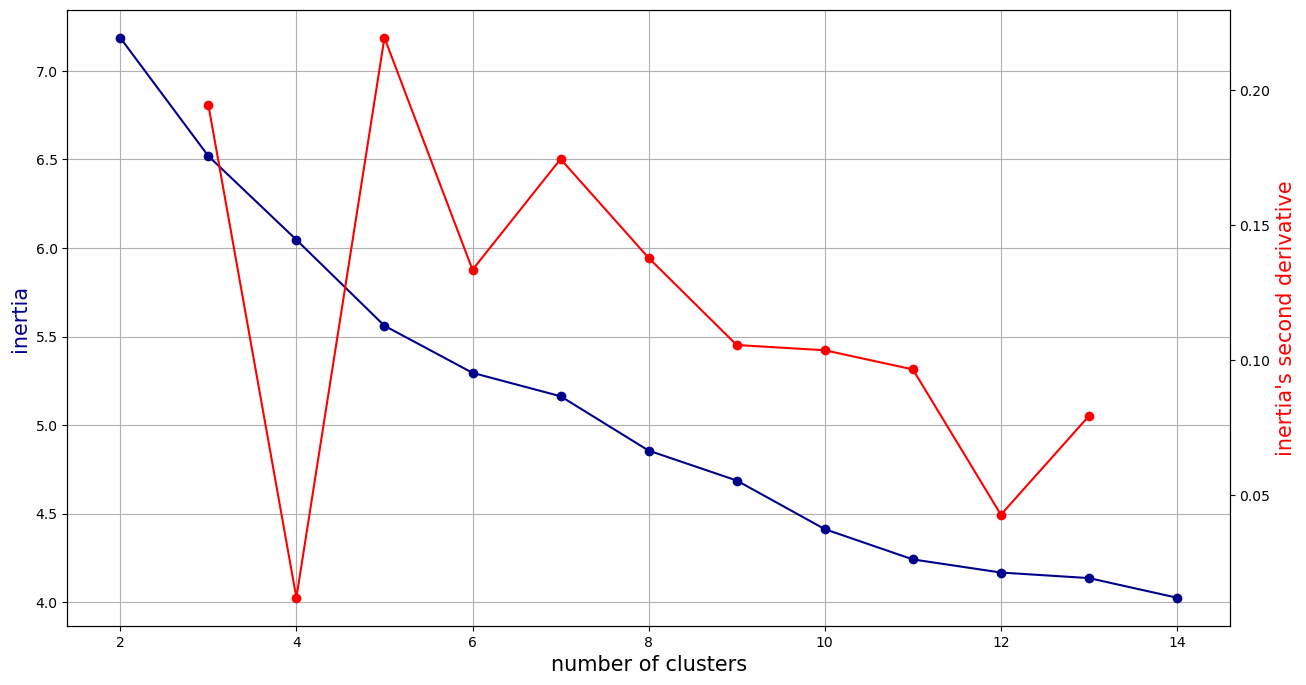

In [52]:
plot_inertia(data_diabetes)

In [56]:
def plot_colorvar(data, dataset_dict, coloring_variable_name='target'):
    if coloring_variable_name == 'target':
        coloring_variable = dataset_dict['target']
    else:
        dim_index = np.where(dataset_dict['feature_names'] == coloring_variable_name)
        coloring_variable = dataset_dict['data'][:,dim_index].squeeze()

    plt.figure(figsize=(15,8))
    plt.xlabel('PC1', fontsize=15)
    plt.ylabel('PC2', fontsize=15)
    plt.scatter(data[:,0],data[:,1], c=coloring_variable, s=25)
    plt.colorbar()
    plt.title(f'Coloring variable: {coloring_variable_name}', fontsize=15)
    plt.grid()

In [54]:
pca = PCA(n_components=2)
reduced_data_diabetes = pca.fit_transform(data_diabetes)

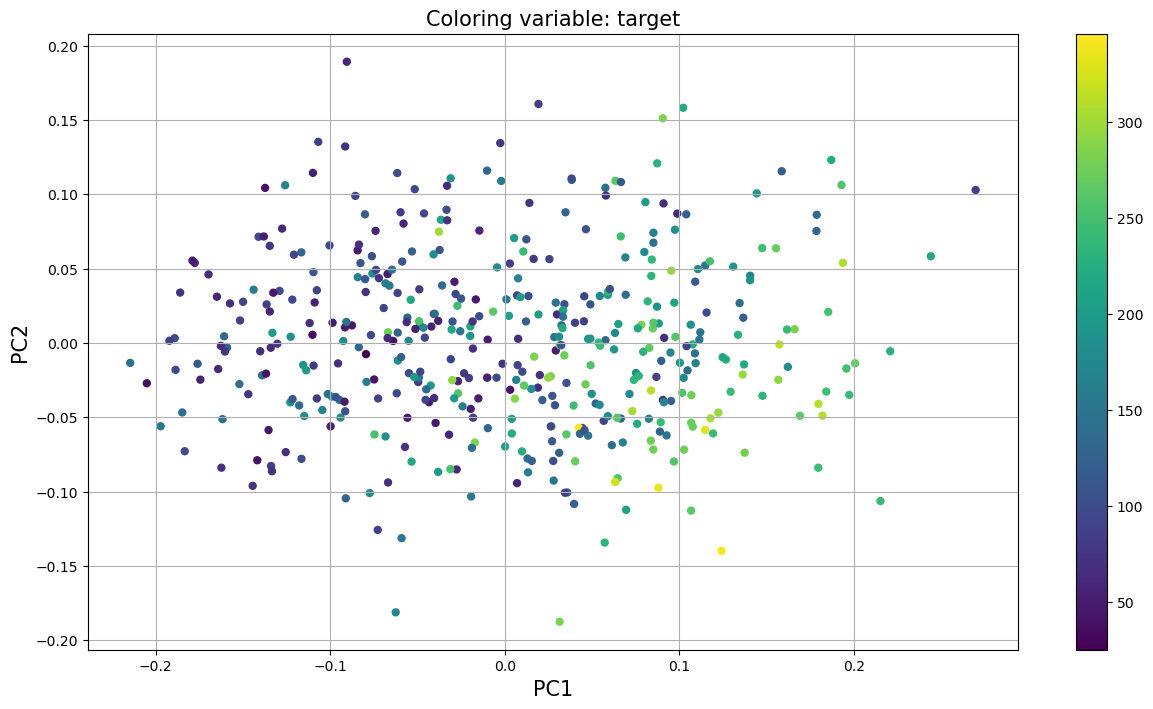

In [57]:
coloring_variable_name = 'target'
plot_colorvar(reduced_data_diabetes, dataset_diabetes_dict, coloring_variable_name)

In [58]:
def plot_predictions(data, predictions):
    plt.figure(figsize=(15,8))
    for val in np.unique(predictions):
        mask = predictions==val
        plt.scatter(data[mask,0],data[mask,1], label=val)

    plt.xlabel('PC1', fontsize=15)
    plt.ylabel('PC2', fontsize=15)
    plt.grid()
    plt.legend(fontsize=10)

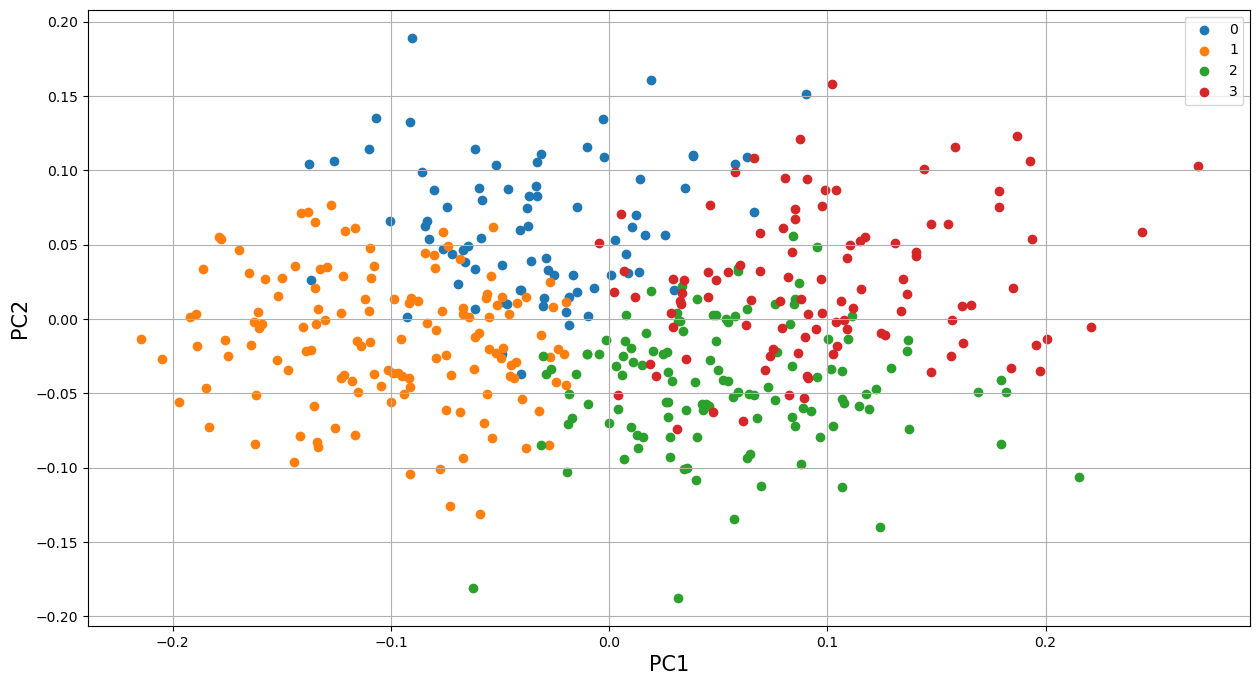

In [62]:
n_clusters = 4
clusterer = KMeans(n_clusters=n_clusters)
clusterer.fit(data_diabetes)
k_means_predictions = clusterer.predict(data_diabetes)

plot_predictions(reduced_data_diabetes, k_means_predictions)